epoch 20, x1 -0.010599, x2 0.000000


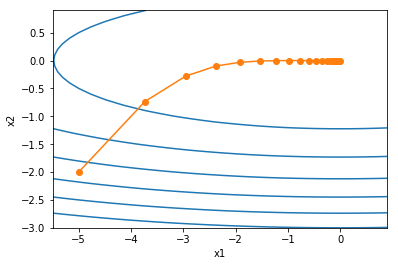

In [2]:
%matplotlib inline
import numpy as np
import time
import math
import sys
import tensorflow as tf
sys.path.append("..") 
import d2lzh_tensorflow2 as d2l
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [8]:
features, labels = d2l.get_data_ch7()

def init_rmsprop_states():
    s_w = tf.zeros((features.shape[1],1),dtype=tf.float32)
    s_b = tf.zeros(1,dtype=tf.float32)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams,grads):
    gamma, eps, i = hyperparams['gamma'], 1e-6, 0
    for p, s in zip(params, states):
        s=gamma*s+(1-gamma)*(grads[i])**2
        p.assign_sub(hyperparams['lr']*grads[i]/tf.sqrt(s+eps))
        i+=1 

loss: 0.335438, 1.413757 sec per epoch


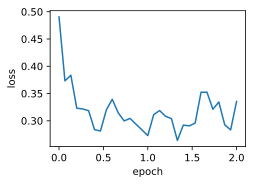

In [9]:
d2l.train_ch7(rmsprop, init_rmsprop_states(), {'lr': 0.01, 'gamma': 0.9},
              features, labels)

In [12]:
from tensorflow.keras import optimizers
trainer = optimizers.RMSprop(learning_rate=0.01,rho=0.9)

loss: 0.662946, 1.610282 sec per epoch


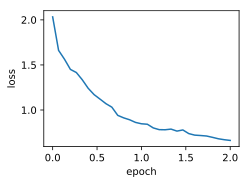

In [13]:
d2l.train_tensorflow2_ch7(trainer, {'lr': 0.01},
                    features, labels)